In [1]:
import h5py as h5
import matplotlib as mpl
import matplotlib.pyplot as pp
import numpy as np
import pandas as pd

%matplotlib inline

mpl.rcParams["text.latex.preamble"] = r"\usepackage{siunitx}"

In [2]:
def read_logits(file_path, h5_path):
    with h5.File(file_path) as f:
        label_index = list(f["label_index"])
        grp = f[h5_path]
        timestamps = np.array(grp["timestamps"])
        labels = np.array(grp["labels"])
        logits = np.array(grp["data"])
        
        return label_index, timestamps, labels, logits

In [3]:
label_index, timestamps, labels, logits = read_logits("/home/cqql/Seafile/thesis/16-gestures/data/classifications/gists.h5", "/classifications/marten-19")

# Convert timestamps to seconds
timestamps = timestamps / 10**6

# Restrict domain to 2-13 seconds
fltr = (timestamps >= 2) & (timestamps <= 13)
timestamps = timestamps[fltr]
labels = labels[fltr]
logits = logits[fltr]

# Softmax
p = np.exp(logits)
p /= np.sum(p, axis=1)[:, np.newaxis]

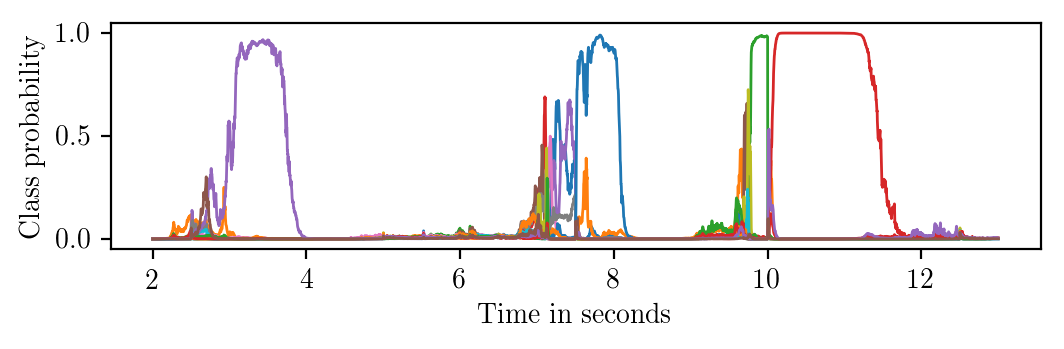

In [4]:
fig, ax = pp.subplots(1, 1, figsize=(6, 1.5), dpi=200)

for i in range(len(label_index)):
    ax.plot(timestamps, p[:, i], lw=1)

# <blank> class
#ax.plot(timestamps, p[:, -1], lw=1, alpha=0.25, ls="--", c="0.25")
    
ax.set_xlabel("Time in seconds")
ax.set_ylabel("Class probability")
ax.set_yticks([0, 0.5, 1.0])

In [5]:
fig.savefig("../doc/figures/methods/framewise.pdf", bbox_inches="tight")

In [6]:
label_index, timestamps, labels, logits = read_logits("/home/cqql/Seafile/thesis/16-gestures/data/ctc/gists.h5", "/classifications/marten-19")

# Convert timestamps to seconds
timestamps = timestamps / 10**6

# Restrict domain to 2-13 seconds
fltr = (timestamps >= 2) & (timestamps <= 13)
timestamps = timestamps[fltr]
labels = labels[fltr]
logits = logits[fltr]

# Softmax
p = np.exp(logits)
p /= np.sum(p, axis=1)[:, np.newaxis]

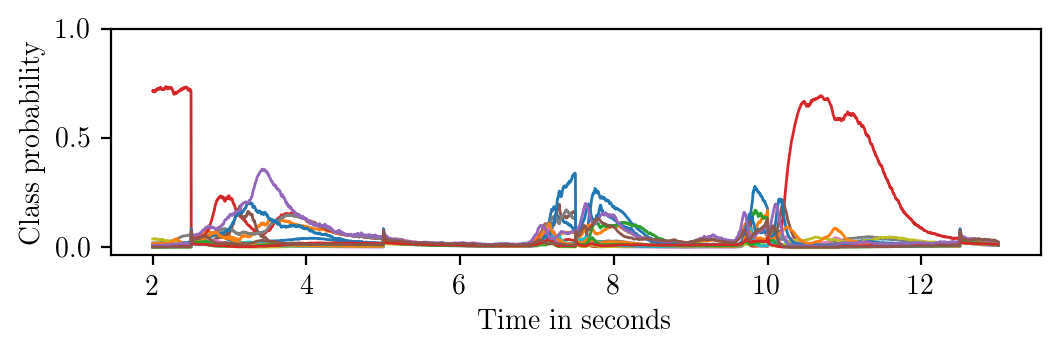

In [7]:
fig, ax = pp.subplots(1, 1, figsize=(6, 1.5), dpi=200)

for i in range(len(label_index)):
    ax.plot(timestamps, p[:, i], lw=1)

# <blank> class
#ax.plot(timestamps, p[:, -1], lw=1, alpha=0.25, ls="--", c="0.25")
    
ax.set_xlabel("Time in seconds")
ax.set_ylabel("Class probability")
ax.set_yticks([0, 0.5, 1.0])

In [8]:
fig.savefig("../doc/figures/methods/ctc.pdf", bbox_inches="tight")